# HSF Auto-scaling routine - velocity components
The ultimate goal is to find the maximum relative velocity between two intersecting orbits. However, since that leads to a non-analytic solution, instead we choose to find $$dv_{max} \sim \sqrt{(max(v_{r,1})+max(v_{r,2}))^2 + (max(v_{\phi,1})-max(v_{\phi,2}))^2}$$ within the overlapping region.

In [1]:
from sympy import *
init_printing()

In [38]:
r,e1,e2,cosf1,cosf2,a1,a2,m1,m2,G,M = symbols("r, e1, e2, f1, f2, a1, a2, m1, m2, G, M")

In [39]:
mu = G*M
n1 = sqrt(mu/(a1**3))
n2 = sqrt(mu/(a2**3))
v1 = sqrt(mu*(2/r - 1/a1))
v2 = sqrt(mu*(2/r - 1/a2))
cosf1 = (a1*(1-e1*e1)/r - 1)/e1
cosf2 = (a2*(1-e2*e2)/r - 1)/e2
sinf1 = -sqrt(1 - cosf1*cosf1)
sinf2 = sqrt(1 - cosf2*cosf2)
v1_phi = n1*a1/sqrt(1-e1*e1)*(1+e1*cosf1)
v2_phi = n2*a2/sqrt(1-e2*e2)*(1+e2*cosf2)
#v1_r = n1*a1/sqrt(1-e1*e1)*(e1*sinf1)       #can be +/-
#v2_r = n2*a2/sqrt(1-e2*e2)*(e2*sinf2)       #can be +/-
v1_r = sqrt(v1*v1 - v1_phi*v1_phi)           #can be +/-
v2_r = sqrt(v2*v2 - v2_phi*v2_phi)           #can be +/-

Since each term is solved individually, we really only need to analyze body 1, since 2 will be exactly the same.

In [41]:
#v_phi
dv_phi = solve(diff(v1_phi,r),r)
dv_phi

In [42]:
#v_r
dv_r = solve(diff(v1_r,r),r)
dv_r

# Plotting Stuff
From plotting a few simple cases, it looks like just doing v1 - v2 (i.e. a 1-D velocity solution) has no max/min solution

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/Users/silburt/anaconda2/envs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in sqrt


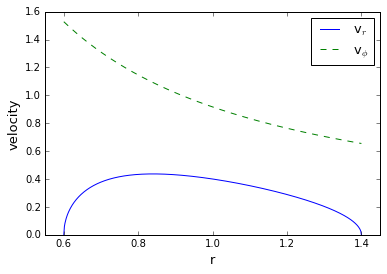

In [3]:
#Plot the relative velocity
G = 1
M = 1
mu = G*M
a1 = 1.
a2 = 1.05
e1 = 0.4
e2 = 0.1
min_ = 0.6
max_ = 1.4
r = np.linspace(min_,max_,500)

n1 = np.sqrt(mu/(a1**3))
n2 = np.sqrt(mu/(a2**3))
cosf1 = (a1*(1-e1*e1)/r - 1)/e1
cosf2 = (a2*(1-e2*e2)/r - 1)/e2
sinf1 = np.sqrt(1 - cosf1*cosf1)        #these are +/-
sinf2 = np.sqrt(1 - cosf2*cosf2)        #these are +/-
v1_phi = n1*a1/np.sqrt(1-e1*e1)*(1+e1*cosf1)
v2_phi = n2*a2/np.sqrt(1-e2*e2)*(1+e2*cosf2)
v1_r = n1*a1/np.sqrt(1-e1*e1)*(e1*sinf1)
v2_r = n2*a2/np.sqrt(1-e2*e2)*(e2*sinf2)
#v1_r = np.sqrt(mu*(2/r - 1/a1) - v1_phi*v1_phi)
#v2_r = np.sqrt(mu*(2/r - 1/a2) - v2_phi*v2_phi)

r_sol = a1*(1-e1**2)

plt.plot(r,v1_r, color='blue',label='v$_r$');
plt.plot(r,v1_phi, color='green',linestyle='--',label='v$_{\phi}$')
#plt.plot([r_sol, r_sol], [0,0.5], color='blue', linestyle='--', label='r_max')
plt.legend(loc="upper right",fontsize=13)
plt.ylabel("velocity",fontsize=13)
plt.xlabel("r",fontsize=13)
#plt.xlim([0.55,1.45])
plt.savefig("vr_vphi_plot.pdf")

/Users/silburt/anaconda2/envs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/Users/silburt/anaconda2/envs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()
/Users/silburt/anaconda2/envs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide


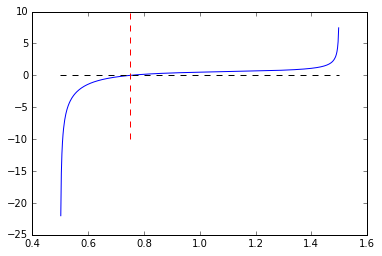

In [10]:
#Plot dv/dr, i.e. where dv/dr = 0 is the maximum value of dv.
term1 = 2*G*M*(np.sqrt(-G*M*(-a1**2*(e1**2 - 1) - r*(2*a1 - r))/(a1*r**2))*(a2*(e2**2 - 1) + r) + np.sqrt(-G*M*(-a2**2*(e2**2 - 1) - r*(2*a2 - r))/(a2*r**2))*(a1*(e1**2 - 1) + r))*(np.sqrt(-G*M*(-a1**2*(e1**2 - 1) - r*(2*a1 - r))/(a1*r**2)) + np.sqrt(-G*M*(-a2**2*(e2**2 - 1) - r*(2*a2 - r))/(a2*r**2)))
term2 = 2*np.sqrt(-G*M*(-a1**2*(e1**2 - 1) - r*(2*a1 - r))/(a1*r**2))*np.sqrt(-G*M*(-a2**2*(e2**2 - 1) - r*(2*a2 - r))/(a2*r**2))*(a1**2*np.sqrt(G*M/a1**3)*np.sqrt(-e1**2 + 1) - a2**2*np.sqrt(G*M/a2**3)*np.sqrt(-e2**2 + 1))**2
ddv_true = term1 + term2
ddv_true = -a1**2*np.sqrt(G*M/a1**3)*np.sqrt(-e1**2 + 1)*(a1*(-e1**2 + 1)/r - 1)/(e1*r**2*np.sqrt(1 - (a1*(-e1**2 + 1)/r - 1)**2/e1**2))

plt.plot(r,ddv_true)
plt.plot([min_,max_],[0,0],'k--')
plt.plot([r_sol, r_sol],[-10,10],'r--')

## Extra code
This was when I was solving each component of velocity separately, but still finding the max of the combined bodies, i.e. $$dv_{max} \approx \sqrt{max(v_{r,1} - v_{r,2})^2 + max(v_{\phi,1} - v_{\phi,2})^2}$$

Turns out $max(v_{\phi,1} - v_{\phi,2})$ was easy, but $max(v_{r,1} - v_{r,2})$ led to a quartic equation which is shown below.

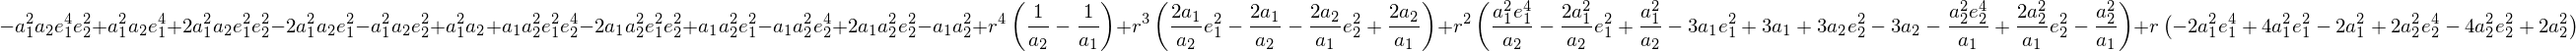

In [107]:
choice = 1

if choice == 1:    
    ddv_r_1 = (sqrt(G*M*(-a1**2*(-e1**2 + 1) + r*(2*a1 - r))/(a1*r**2))*(a2*(e2**2 - 1) + r))**2 - (sqrt(G*M*(-a2**2*(-e2**2 + 1) + r*(2*a2 - r))/(a2*r**2))*(a1*(e1**2 - 1) + r))**2
    ddv_r_1 = expand(ddv_r_1)
    sol_r = collect(expand(ddv_r_1*r**2/(G*M)),r)
elif choice == 2:
    ddv_r_2 = (a1**2*e2*sqrt(G*M/a1**3)*sqrt((e2**2*r**2 - (a2*(e2**2 - 1) + r)**2)/(e2**2*r**2))*sqrt(-e1**2 + 1)*(a1*(e1**2 - 1) + r))**2 + (a2**2*e1*sqrt(G*M/a2**3)*sqrt((e1**2*r**2 - (a1*(e1**2 - 1) + r)**2)/(e1**2*r**2))*sqrt(-e2**2 + 1)*(a2*(e2**2 - 1) + r))**2
    ddv_r_2 = expand(ddv_r_2)
    sol_r = collect(expand(ddv_r_2*r**2/(G*M)),r)
sol_r

In [32]:
A, B, C, D = symbols("A, B, C, D")
expr = r**4 + A*r**3 + B*r**2 + C*r + D
soln = solve(expr,r)